In [ ]:
from script import get_all_data

# data = get_all_data(sample_size=100_000) # 2.92 GB
data = get_all_data(sample_size=10_000)

total data size: 2.93 gb
total data size: 2.93 gb


In [2]:
# print all categories(1st column) and their counts

In [4]:
print(data.columns)
print(data.dtypes)
print(data.head())

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'category'],
      dtype='object')
rating               float64
title                 object
text                  object
images                object
asin                  object
parent_asin           object
user_id               object
timestamp              int64
helpful_vote           int64
verified_purchase       bool
category              object
dtype: object
   rating                                              title  \
0     4.0                                               Soft   
1     4.0  TRY THIS! test on FACE for match not hands, ev...   
2     5.0                                  Excellent product   
3     5.0                                         Five Stars   
4     5.0                                Awesome foundation!   

                                                text  \
0  I wear headbands like this in the evening when...   


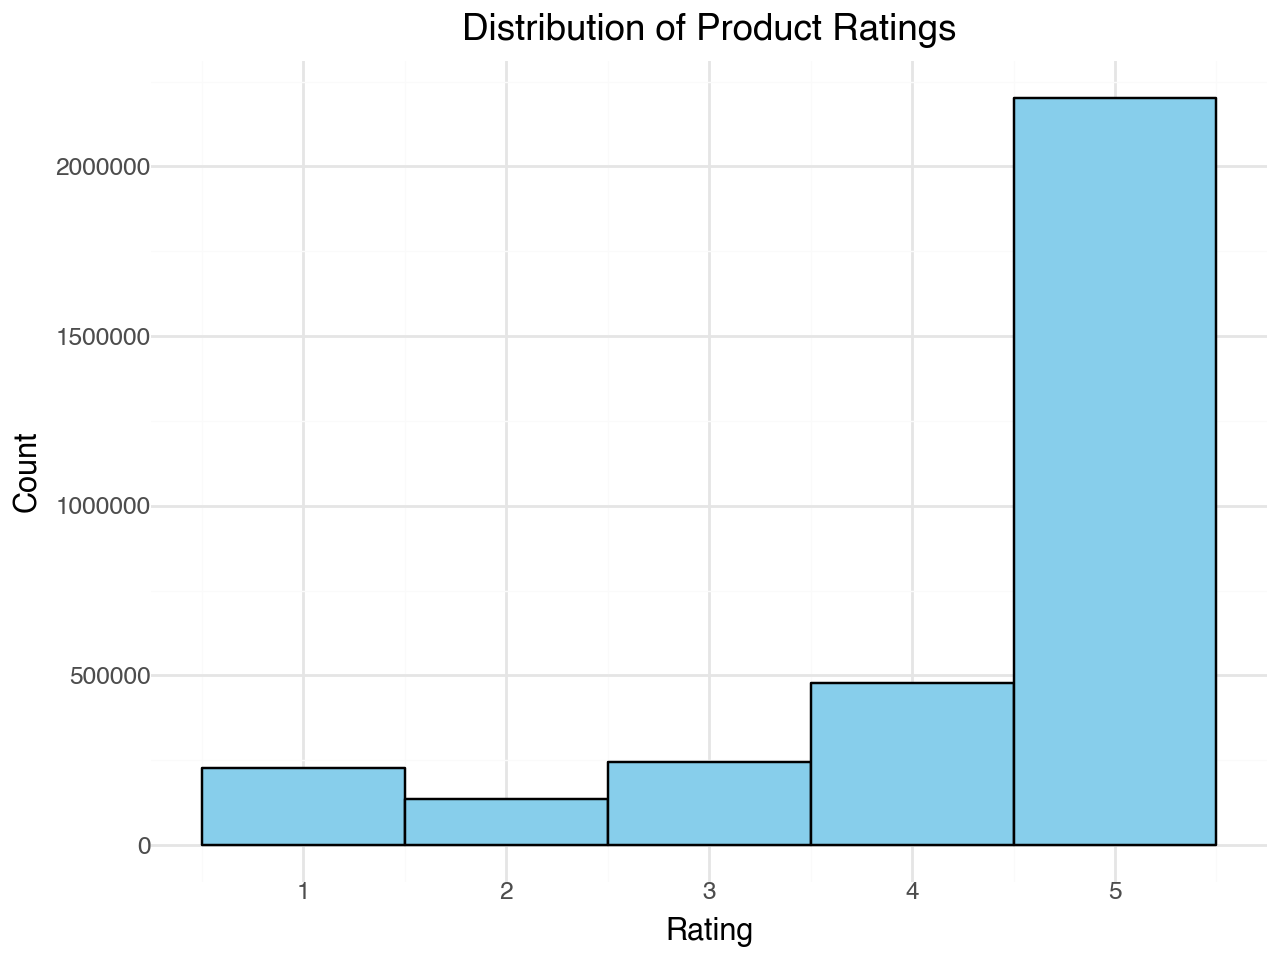

In [7]:
from plotnine import *
import pandas as pd

# rating distribution
(ggplot(data, aes(x='rating'))
 + geom_histogram(binwidth=1, fill='skyblue', color='black')
 + labs(title='Distribution of Product Ratings',
        x='Rating',
        y='Count')
 + theme_minimal())

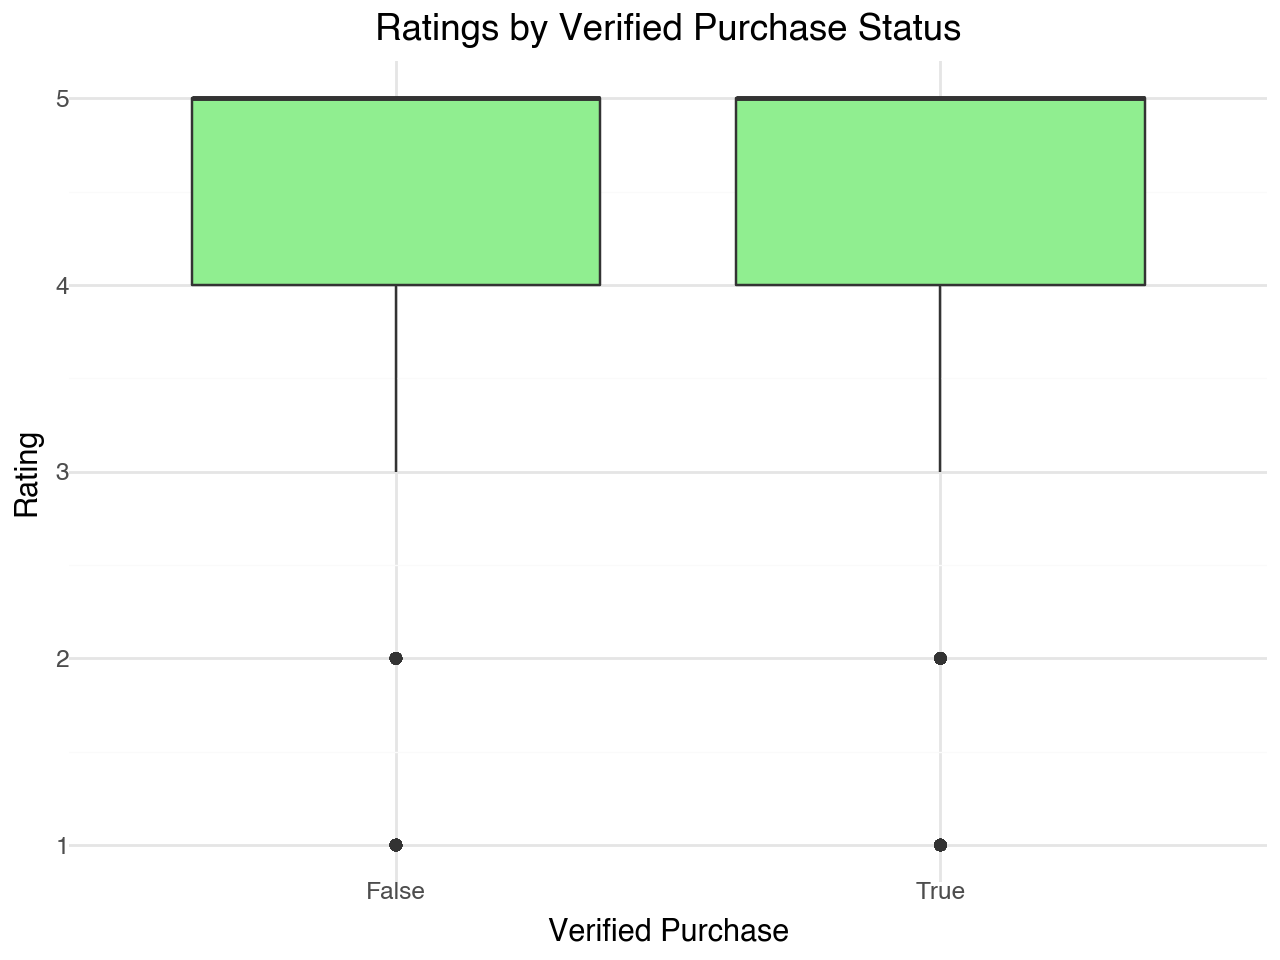

In [8]:
# Verified purchase vs rating
(ggplot(data, aes(x='verified_purchase', y='rating'))
 + geom_boxplot(fill='lightgreen')
 + labs(title='Ratings by Verified Purchase Status',
        x='Verified Purchase',
        y='Rating')
 + theme_minimal())

In [10]:
# Relationship between rating and helpful votes
(ggplot(data, aes(x='rating', y='helpful_vote'))
 + geom_jitter(alpha=0.5)
 + geom_smooth(method='lm', color='red')
 + labs(title='Relationship between Ratings and Helpful Votes',
        x='Rating',
        y='Number of Helpful Votes')
 + theme_minimal())

KeyboardInterrupt: 

In [ ]:

# Rating Distribution
p1 = (ggplot(data, aes(x='rating'))
      + geom_histogram(binwidth=0.5, fill='skyblue', color='black')
      + labs(title='Distribution of Product Ratings',
             x='Rating',
             y='Count')
      + theme_minimal())

# Verified vs Non-Verified Purchase Ratings
p2 = (ggplot(data, aes(x='verified_purchase', y='rating', fill='verified_purchase'))
      + geom_boxplot()
      + labs(title='Ratings by Verification Status',
             x='Verified Purchase',
             y='Rating')
      + theme_minimal()
      + scale_fill_brewer(palette='Set2'))

# Helpful Votes vs Rating
p3 = (ggplot(data, aes(x='rating', y='helpful_vote'))
      + geom_point(alpha=0.6)
      + geom_smooth(method='lm')
      + labs(title='Helpful Votes vs Rating',
             x='Rating',
             y='Helpful Votes')
      + theme_minimal())

# Convert timestamp to datetime for temporal analysis
data['date'] = pd.to_datetime(data['timestamp'], unit='ms')
p4 = (ggplot(data, aes(x='date', y='rating'))
      + geom_point()
      + geom_smooth()
      + labs(title='Rating Trends Over Time',
             x='Date',
             y='Rating')
      + theme_minimal()
      + theme(axis_text_x=element_text(angle=45)))

